In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sp500 = yf.download('^GSPC', start='2018-01-01', end='2022-12-31', progress=False)

YF.download() has changed argument auto_adjust default to True


In [3]:
prices = sp500['Close']

In [4]:
scaled_prices = []

for i in range(len(prices)):
    x = prices.squeeze().iloc[i]
    y = (x - prices.squeeze().min()) / (prices.squeeze().max() - prices.squeeze().min())
    scaled_prices.append(y)

In [5]:
log_returns = []

for i in range(1,len(prices)):
    x = np.log(prices.squeeze().iloc[i]) - np.log(prices.squeeze().iloc[i-1])
    log_returns.append(x)

log_returns.insert(0,0)

In [6]:
X = pd.DataFrame({
    'Close Prices': prices.squeeze(),
    # 'Log Returns': log_returns,
    # 'Scaled Prices': scaled_prices
})

X['PCT'] = X['Close Prices'].pct_change() * 100
X['PCT-1'] = X['PCT'].shift(1)
X['PCT-2'] = X['PCT'].shift(2)
X['PCT-3'] = X['PCT'].shift(3)
X['PCT-4'] = X['PCT'].shift(4)
X['PCT-5'] = X['PCT'].shift(5)
X['PCT-6'] = X['PCT'].shift(6)
X['PCT-7'] = X['PCT'].shift(7)

X = X.dropna()
X

,Close Prices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7
Date,,,,,,,,,
2018-01-12,2786.239990,0.674960,0.703365,-0.111223,0.130293,0.166234,0.703377,0.402864,0.639882
2018-01-16,2776.419922,-0.352449,0.674960,0.703365,-0.111223,0.130293,0.166234,0.703377,0.402864
2018-01-17,2802.560059,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.130293,0.166234,0.703377
2018-01-18,2798.030029,-0.161639,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.130293,0.166234
2018-01-19,2810.300049,0.438524,-0.161639,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.130293
...,...,...,...,...,...,...,...,...,...
2022-12-23,3844.820068,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168,-0.605272
2022-12-27,3829.250000,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168
2022-12-28,3783.219971,-1.202064,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775


In [7]:
X = X.copy()
X['EMA-4'] = X['PCT'].ewm(span=4, adjust=False).mean().shift(1)

X = X[4:]
X

,Close Prices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7,EMA-4
Date,,,,,,,,,,
2018-01-19,2810.300049,0.438524,-0.161639,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.130293,0.256344
2018-01-22,2832.969971,0.806673,0.438524,-0.161639,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.329216
2018-01-23,2839.129883,0.217437,0.806673,0.438524,-0.161639,0.941505,-0.352449,0.674960,0.703365,0.520199
2018-01-24,2837.540039,-0.055998,0.217437,0.806673,0.438524,-0.161639,0.941505,-0.352449,0.674960,0.399094
2018-01-25,2839.250000,0.060262,-0.055998,0.217437,0.806673,0.438524,-0.161639,0.941505,-0.352449,0.217057
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,3844.820068,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168,-0.605272,-0.416279
2022-12-27,3829.250000,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168,-0.015043
2022-12-28,3783.219971,-1.202064,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-0.171011


In [8]:
Data = pd.DataFrame()

Data['PCT today'] = X['PCT']
Data['PCT today-1'] = X['PCT-1']
Data['PCT today-2'] = X['PCT-2']
Data['PCT today-3'] = X['PCT-3']
Data['PCT today-4'] = X['PCT-4']
Data['PCT today-5'] = X['PCT-5']
Data['PCT today-6'] = X['PCT-6']
Data['PCT today-7'] = X['PCT-7']
Data['EMA-4'] = X['EMA-4']

Data = Data.dropna()

Data

,PCT today,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7,EMA-4
Date,,,,,,,,,
2018-01-19,0.438524,-0.161639,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.130293,0.256344
2018-01-22,0.806673,0.438524,-0.161639,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.329216
2018-01-23,0.217437,0.806673,0.438524,-0.161639,0.941505,-0.352449,0.674960,0.703365,0.520199
2018-01-24,-0.055998,0.217437,0.806673,0.438524,-0.161639,0.941505,-0.352449,0.674960,0.399094
2018-01-25,0.060262,-0.055998,0.217437,0.806673,0.438524,-0.161639,0.941505,-0.352449,0.217057
...,...,...,...,...,...,...,...,...,...
2022-12-23,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168,-0.605272,-0.416279
2022-12-27,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168,-0.015043
2022-12-28,-1.202064,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-0.171011


In [9]:
InputData = Data.drop('PCT today',axis='columns')
InputData

,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7,EMA-4
Date,,,,,,,,
2018-01-19,-0.161639,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.130293,0.256344
2018-01-22,0.438524,-0.161639,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.329216
2018-01-23,0.806673,0.438524,-0.161639,0.941505,-0.352449,0.674960,0.703365,0.520199
2018-01-24,0.217437,0.806673,0.438524,-0.161639,0.941505,-0.352449,0.674960,0.399094
2018-01-25,-0.055998,0.217437,0.806673,0.438524,-0.161639,0.941505,-0.352449,0.217057
...,...,...,...,...,...,...,...,...
2022-12-23,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168,-0.605272,-0.416279
2022-12-27,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168,-0.015043
2022-12-28,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-0.171011


In [10]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - x ** 2

In [13]:
# DL

np.random.seed(42)

# Initialize neural network parameters
ninputs = 8
nhidden_1 = 5
nhidden_2 = 3
noutput = 1

weights1 = np.random.uniform(-1, 1, (ninputs, nhidden_1))  # Weights from input to hidden
weights2 = np.random.uniform(-1, 1, (nhidden_1, nhidden_2)) # Weights from first hidden to next hidden
weights3 = np.random.uniform(-1, 1, (nhidden_2, noutput)) # Weights to output

hiddenbias_1 = np.random.uniform(-1, 1, (noutput, nhidden_1)) # Bias for first hidden layer
hiddenbias_2 = np.random.uniform(-1, 1, (noutput, nhidden_2)) # Bias for next hidden layer
outbias = np.random.uniform(-1, 1, (noutput, noutput)) # Bias for output layer

# learning_rate = 0.005
learning_rate = 0.0005
epochs = 101

k = 0.0002
T = 253

arr = np.arange(1,epochs)
SRarr = []

dropout_rate = 0.2

for epoch in range(1,epochs):
    
    allocations = np.zeros(len(InputData))
    net_input = np.zeros(len(InputData))
    
    for i in range(1,len(InputData) + 1):
        current_input = InputData.iloc[i-1]
        current_input = current_input.to_numpy().reshape(1, -1)
    
        # Forward Pass
        hidden_input_1 = np.dot(current_input, weights1) + hiddenbias_1
        hidden_output_1 = tanh(hidden_input_1)

        dropout_mask_1 = (np.random.rand(*hidden_output_1.shape) > dropout_rate).astype(float)
        hidden_output_1 = hidden_output_1 * dropout_mask_1

        hidden_input_2 = np.dot(hidden_output_1, weights2) + hiddenbias_2
        hidden_output_2 = tanh(hidden_input_2)

        dropout_mask_2 = (np.random.rand(*hidden_output_2.shape) > dropout_rate).astype(float)
        hidden_output_2 = hidden_output_2 * dropout_mask_2
    
        output_input = np.dot(hidden_output_2, weights3) + outbias
        output = tanh(output_input)
        net_input[i-1] = output_input.item()
        allocations[i-1] = output.item()
    
    # Calculation for Asset Returns and Mu
    asset_returns = allocations * Data['PCT today'].values
    average_daily_return = np.mean(asset_returns)
    average_daily_excess_return = average_daily_return - k
    
    # Calculation of Standard deviation
    squared_deviations = np.square(asset_returns - average_daily_excess_return)
    sigma = np.sqrt(np.mean(squared_deviations))
    
    # Annulaized Sharpe Ratio
    annualized_SR = np.sqrt(T) * (average_daily_excess_return / sigma)
    SRarr.append(annualized_SR)

    # Select highest return pattern
    max_index = np.argmax(asset_returns)
    
    # Update weights per pattern    
    # Backpropagation
    a = np.sqrt(T) / sigma
    b = average_daily_excess_return / sigma
    c = (asset_returns[max_index] - (average_daily_excess_return + k)) / sigma
            
    Ct = a * (1 - (b * c))
    
    beta_output = Ct * Data['PCT today'].iloc[max_index] * (1 - np.square(allocations[max_index])) * net_input[max_index] # Also the delta
    beta_hidden_2 = tanh_derivative(hidden_output_2) * (weights3 * beta_output).T
    beta_hidden_1 = tanh_derivative(hidden_output_1) * np.dot(beta_hidden_2, weights2.T)

    
    weights3 += learning_rate * beta_output
    weights2 += learning_rate * np.dot(hidden_output_1.T, beta_hidden_2)
    weights1 += learning_rate * np.dot(current_input.T, beta_hidden_1)
    outbias += learning_rate * beta_output
    hiddenbias_2 += learning_rate * beta_hidden_2
    hiddenbias_1 += learning_rate * beta_hidden_1
        
    if epoch % 50 == 0:
        print(f"Epoch {epoch}")
        print(f"Gradient: {beta_output}, Weight Update: {learning_rate * beta_output}, Ct: {Ct}")
        print(f"Weights1: {weights1}")
        print(f"Weights2: {weights2}")
        print(f"Weights3: {weights3}")
        print(f"Hiiden Bias1: {hiddenbias_1}, Hiiden Bias2: {hiddenbias_2}, Out Bias: {outbias}")
        print(f"Allocations: {allocations}, Net_Input: {net_input}")
        print(f"Asset Returns: {asset_returns}, Average Daily Excess Return: {average_daily_excess_return}")
        print(f"Sigma: {sigma}, Annualized SR: {annualized_SR}")

Epoch 50
Gradient: 28.765205183378907, Weight Update: 0.014382602591689454, Ct: 18.475745580632875
Weights1: [[-0.84228476  1.44457277  0.13485868 -0.32613489 -0.58654096]
 [-0.28090657 -1.25774123  0.95892969  0.56258201  0.34632492]
 [-0.82168198  0.81385402  0.74121674 -0.45392312 -0.65987174]
 [-0.83192671 -0.20898501 -0.06109519 -0.31202262 -0.38345765]
 [ 0.71314322 -1.17054021 -0.14331015  0.16595348 -0.17180075]
 [ 0.06681581 -0.13817545 -0.25177842 -0.26088023 -0.82074047]
 [ 0.17995804 -0.62668478 -0.88944964  0.86667398  0.9372893 ]
 [ 0.49880368 -0.28240262 -0.87032467  0.26402528 -0.09945902]]
Weights2: [[-0.87568061 -0.02689061 -1.06449992]
 [ 1.27382878 -0.53733987  0.34257147]
 [-0.80748488  0.06654917  0.04572325]
 [-1.09329969  0.94482076  0.46489188]
 [ 0.28088256  0.85502586  0.21184511]]
Weights3: [[2.11605892]
 [0.44929545]
 [0.66427617]]
Hiiden Bias1: [[-1.24821661 -0.03828393 -0.41113574 -0.75707968  0.71555865]], Hiiden Bias2: [[ 0.42498983 -0.52902822  0.09303

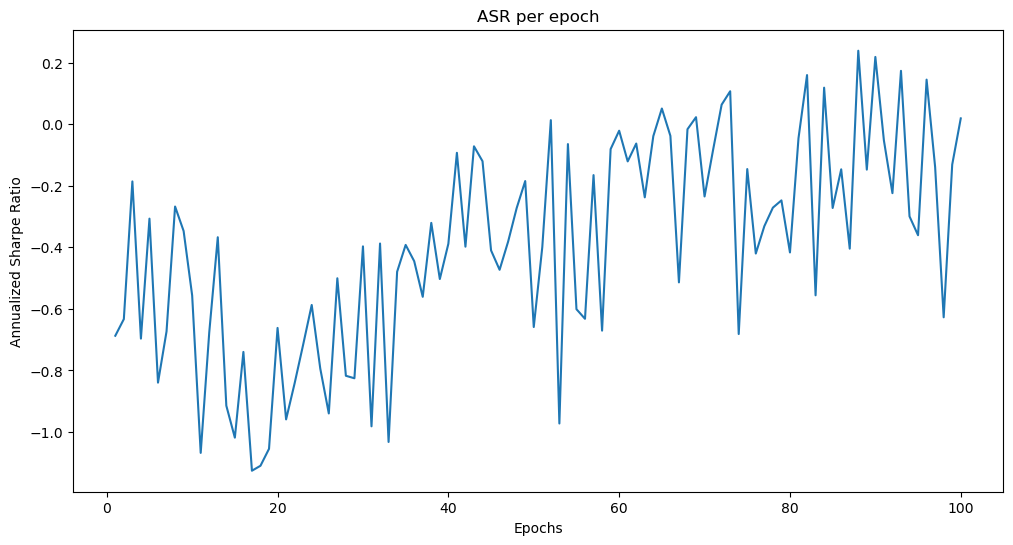

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(arr, SRarr)
plt.xlabel("Epochs")
plt.ylabel("Annualized Sharpe Ratio")
plt.title("ASR per epoch")
plt.show()

In [12]:
test = yf.download('^GSPC', start='2023-01-01', end='2024-12-31', progress=False)
test_prices = test['Close']

In [13]:
test_scaled_prices = []

for i in range(len(test_prices)):
    x = test_prices.squeeze().iloc[i]
    y = (x - test_prices.squeeze().min()) / (test_prices.squeeze().max() - test_prices.squeeze().min())
    test_scaled_prices.append(y)

In [14]:
test_log_returns = []

for i in range(1,len(test_prices)):
    x = np.log(test_prices.squeeze().iloc[i]) - np.log(test_prices.squeeze().iloc[i-1])
    test_log_returns.append(x)

test_log_returns.insert(0,0)

In [15]:
test_X = pd.DataFrame({
    'Close Prices': test_prices.squeeze(),
    # 'Log Returns': test_log_returns,
    # 'Scaled Prices': test_scaled_prices
})

test_X['PCT'] = test_X['Close Prices'].pct_change() * 100
test_X['PCT-1'] = test_X['PCT'].shift(1)
test_X['PCT-2'] = test_X['PCT'].shift(2)
test_X['PCT-3'] = test_X['PCT'].shift(3)
test_X['PCT-4'] = test_X['PCT'].shift(4)
test_X['PCT-5'] = test_X['PCT'].shift(5)
test_X['PCT-6'] = test_X['PCT'].shift(6)
test_X['PCT-7'] = test_X['PCT'].shift(7)

test_X = test_X.dropna()
test_X

,Close Prices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7
Date,,,,,,,,,
2023-01-13,3999.090088,0.399686,0.341591,1.284942,0.697823,-0.076763,2.284078,-1.164553,0.753897
2023-01-17,3990.969971,-0.203049,0.399686,0.341591,1.284942,0.697823,-0.076763,2.284078,-1.164553
2023-01-18,3928.860107,-1.556260,-0.203049,0.399686,0.341591,1.284942,0.697823,-0.076763,2.284078
2023-01-19,3898.850098,-0.763835,-1.556260,-0.203049,0.399686,0.341591,1.284942,0.697823,-0.076763
2023-01-20,3972.610107,1.891840,-0.763835,-1.556260,-0.203049,0.399686,0.341591,1.284942,0.697823
...,...,...,...,...,...,...,...,...,...
2024-12-23,5974.069824,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,-0.002647,-0.541402
2024-12-24,6040.040039,1.104276,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,-0.002647
2024-12-26,6037.589844,-0.040566,1.104276,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935


In [16]:
test_X = test_X.copy()
test_X['EMA-4'] = test_X['PCT'].ewm(span=4, adjust=False).mean().shift(1)

test_X = test_X[4:]
test_X

,Close Prices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7,EMA-4
Date,,,,,,,,,,
2023-01-20,3972.610107,1.891840,-0.763835,-1.556260,-0.203049,0.399686,0.341591,1.284942,0.697823,-0.621943
2023-01-23,4019.810059,1.188134,1.891840,-0.763835,-1.556260,-0.203049,0.399686,0.341591,1.284942,0.383570
2023-01-24,4016.949951,-0.071150,1.188134,1.891840,-0.763835,-1.556260,-0.203049,0.399686,0.341591,0.705396
2023-01-25,4016.219971,-0.018173,-0.071150,1.188134,1.891840,-0.763835,-1.556260,-0.203049,0.399686,0.394777
2023-01-26,4060.429932,1.100785,-0.018173,-0.071150,1.188134,1.891840,-0.763835,-1.556260,-0.203049,0.229597
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,5974.069824,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,-0.002647,-0.541402,-0.028805
2024-12-24,6040.040039,1.104276,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,-0.002647,0.274208
2024-12-26,6037.589844,-0.040566,1.104276,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,0.606235


In [17]:
test_Data = pd.DataFrame()

test_Data['Close Prices'] = test_X['Close Prices']
test_Data['PCT today'] = test_X['PCT']
test_Data['PCT today-1'] = test_X['PCT-1']
test_Data['PCT today-2'] = test_X['PCT-2']
test_Data['PCT today-3'] = test_X['PCT-3']
test_Data['PCT today-4'] = test_X['PCT-4']
test_Data['PCT today-5'] = test_X['PCT-5']
test_Data['PCT today-6'] = test_X['PCT-6']
test_Data['PCT today-7'] = test_X['PCT-7']
test_Data['EMA-4'] = test_X['EMA-4']

test_Data = test_Data.dropna()

test_Data

,Close Prices,PCT today,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7,EMA-4
Date,,,,,,,,,,
2023-01-20,3972.610107,1.891840,-0.763835,-1.556260,-0.203049,0.399686,0.341591,1.284942,0.697823,-0.621943
2023-01-23,4019.810059,1.188134,1.891840,-0.763835,-1.556260,-0.203049,0.399686,0.341591,1.284942,0.383570
2023-01-24,4016.949951,-0.071150,1.188134,1.891840,-0.763835,-1.556260,-0.203049,0.399686,0.341591,0.705396
2023-01-25,4016.219971,-0.018173,-0.071150,1.188134,1.891840,-0.763835,-1.556260,-0.203049,0.399686,0.394777
2023-01-26,4060.429932,1.100785,-0.018173,-0.071150,1.188134,1.891840,-0.763835,-1.556260,-0.203049,0.229597
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,5974.069824,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,-0.002647,-0.541402,-0.028805
2024-12-24,6040.040039,1.104276,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,-0.002647,0.274208
2024-12-26,6037.589844,-0.040566,1.104276,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,0.606235


In [18]:
input_test_data = test_Data.drop(columns=['Close Prices', 'PCT today'])

/var/folders/0f/84czy2195_s4j094wj7xpbb80000gn/T/ipykernel_2595/394776186.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  shares_to_buy = min(int((trading_capital * allocation) / current_price), max_shares_to_buy)
/var/folders/0f/84czy2195_s4j094wj7xpbb80000gn/T/ipykernel_2595/394776186.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  shares_to_sell = int((trading_capital * abs(allocation)) / current_price)


Final Portfolio Value: 725622.6765136719
Shares Held: 90
Cash: 193998.08178710938


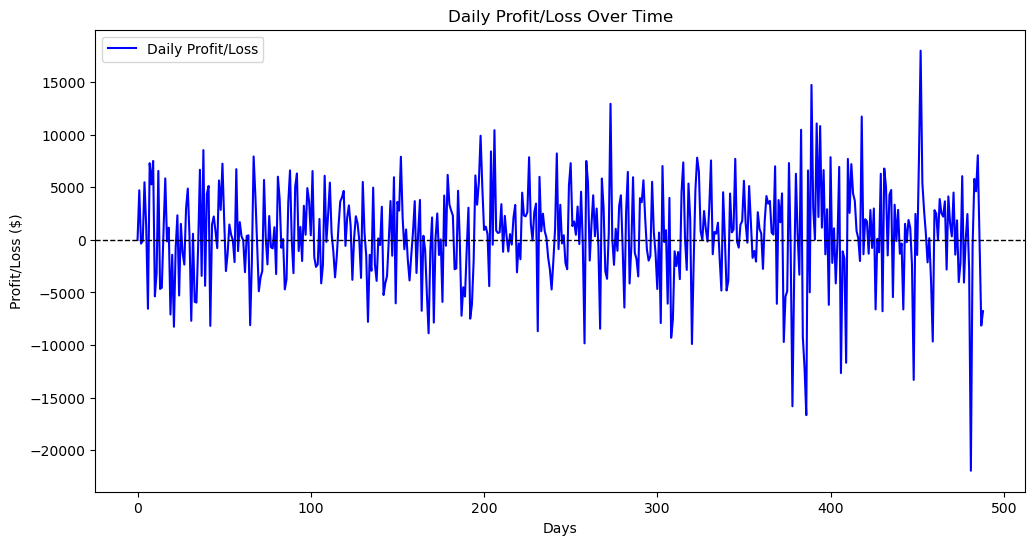

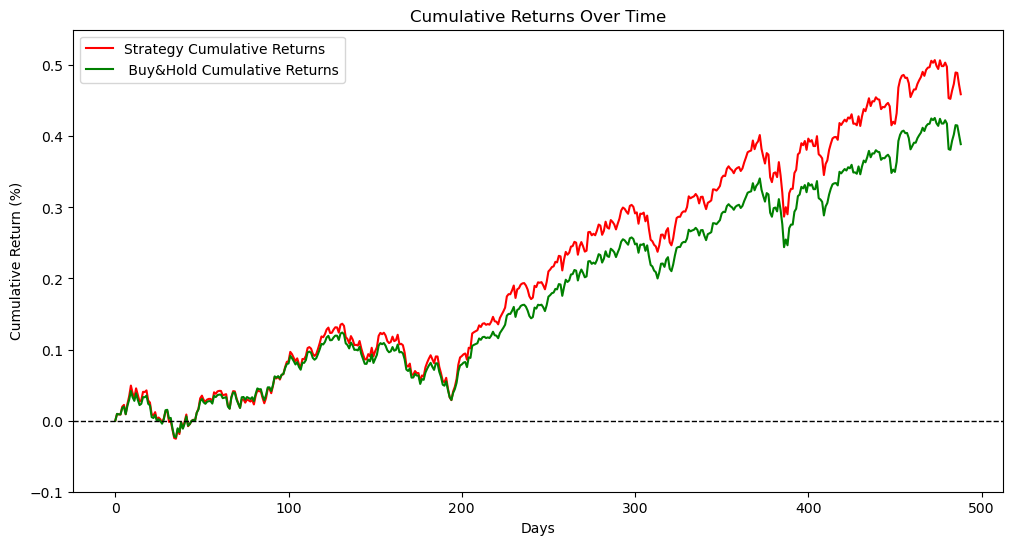

In [26]:
# Initialize tracking variables
portfolio_values = []
profits = []
cumulative_returns = []
allocations = []

# Initialize portfolio
initial_shares = 100
initial_cash = 100000  # Start with no cash
portfolio_value = initial_shares * test_Data['Close Prices'].iloc[0] + initial_cash # Initial portfolio value
trading_capital = 0.2 * portfolio_value  # 20% of portfolio value for trading
shares_held = initial_shares
cash = initial_cash

cumulative_returns.append(0)
portfolio_values.append(portfolio_value)
profits.append(0)

buy_and_hold_value = initial_shares * test_Data['Close Prices'].iloc[0] + initial_cash
buy_and_hold_cumulative_returns = []
buy_and_hold_cumulative_returns.append(0)
buy_and_hold_profits = []
buy_and_hold_profits.append(0)
buy_and_hold_portfolio_values = []
buy_and_hold_portfolio_values.append(buy_and_hold_value)

# Trading simulation
for i in range(1,len(input_test_data)):
    current_price = test_Data['Close Prices'].iloc[i]
    current_input = input_test_data.iloc[i]
    current_input = current_input.to_numpy().reshape(1, -1)
    
    # Forward Pass
    hidden_input_1 = np.dot(current_input, weights1) + hiddenbias_1
    hidden_output_1 = tanh(hidden_input_1)

    hidden_input_2 = np.dot(hidden_output_1, weights2) + hiddenbias_2
    hidden_output_2 = tanh(hidden_input_2)
    
    output_input = np.dot(hidden_output_2, weights3) + outbias
    allocation = tanh(output_input)
    allocations.append(allocation)

    # Recalculate trading capital dynamically
    # trading_capital = 0.2 * portfolio_value

    # Trading logic with risk management
    if allocation > 0:  # Buy signal
        # Calculate the number of shares to buy, ensuring cash does not go negative
        max_shares_to_buy = int(cash / current_price) if cash > 0 else 0
        shares_to_buy = min(int((trading_capital * allocation) / current_price), max_shares_to_buy)
        cost = shares_to_buy * current_price
        
        # Update portfolio
        shares_held += shares_to_buy
        cash -= cost
    elif allocation < 0:  # Sell signal
        # Calculate the number of shares to sell
        shares_to_sell = int((trading_capital * abs(allocation)) / current_price)
        shares_to_sell = min(shares_to_sell, shares_held)  # Cannot sell more than held
        revenue = shares_to_sell * current_price
        
        # Update portfolio
        shares_held -= shares_to_sell
        cash += revenue

    # Update portfolio value
    new_portfolio_value = shares_held * current_price + cash
    daily_profit = new_portfolio_value - portfolio_values[i-1]  # Profit on this day
    portfolio_values.append(new_portfolio_value)
    profits.append(daily_profit)

    new_buy_and_hold_portfolio_value = initial_shares * current_price + initial_cash
    buy_and_hold_daily_profit = new_buy_and_hold_portfolio_value - buy_and_hold_portfolio_values[i-1]
    buy_and_hold_portfolio_values.append(new_buy_and_hold_portfolio_value)
    buy_and_hold_profits.append(buy_and_hold_daily_profit)

    # Calculate cumulative return
    cumulative_returns.append((new_portfolio_value / portfolio_values[0]) - 1)
    buy_and_hold_cumulative_returns.append(((initial_shares * current_price + initial_cash) / buy_and_hold_value) - 1)
    
    # Update portfolio value
    portfolio_value = new_portfolio_value

# Final portfolio value
print(f"Final Portfolio Value: {portfolio_value}")
print(f"Shares Held: {shares_held}")
print(f"Cash: {cash}")

# Plot daily profits
plt.figure(figsize=(12, 6))
plt.plot(profits, label="Daily Profit/Loss", color="blue")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero-profit line
plt.xlabel("Days")
plt.ylabel("Profit/Loss ($)")
plt.title("Daily Profit/Loss Over Time")
plt.legend()
plt.show()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label="Strategy Cumulative Returns", color="red")
plt.plot(buy_and_hold_cumulative_returns, label=" Buy&Hold Cumulative Returns", color="green")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero return line
plt.ylim(-0.1,0.55)
plt.xlabel("Days")
plt.ylabel("Cumulative Return (%)")
plt.title("Cumulative Returns Over Time")
plt.legend()
plt.show()

# Plot buy and hold
# plt.figure(figsize=(12, 6))
# plt.plot(buy_and_hold_cumulative_returns, label="Cumulative Returns", color="green")
# plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero return line
# plt.xlabel("Days")
# plt.ylabel("Cumulative Return (%)")
# plt.title("Buy and Hold Cumulative Returns Over Time")
# plt.legend()
# plt.show()

In [20]:
# Calculation for Asset Returns and Mu
asset_returns = allocations * test_Data['PCT today'].values
average_daily_return = np.mean(asset_returns)
average_daily_excess_return = average_daily_return - k
    
# Calculation of Standard deviation
squared_deviations = np.square(asset_returns - average_daily_excess_return)
sigma = np.sqrt(np.mean(squared_deviations))
    
# Annulaized Sharpe Ratio
annualized_SR = np.sqrt(T) * (average_daily_excess_return / sigma)
print(f"Annualized Sharpe Ratio: {annualized_SR}")

Annualized Sharpe Ratio: 0.9664710148327849


In [21]:
# Calculate daily returns
daily_returns = np.diff(portfolio_values) / portfolio_values[:-1]

# Calculate average daily return
average_daily_return = np.mean(daily_returns)

# Calculate standard deviation of daily returns
std_dev_daily_returns = np.std(daily_returns)

# Annualize the average daily return and standard deviation
annualized_return = average_daily_return * 253
annualized_std_dev = std_dev_daily_returns * np.sqrt(253)

# Risk-free rate
risk_free_rate = 0.0002

# Calculate Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std_dev

print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 1.6830768958939293


In [22]:
sum(profits)

228361.66577148438

In [23]:
sum(allocations)

array([[271.49432349]])

In [24]:
sum(buy_and_hold_profits)

193432.9833984375

In [25]:
allocations

[array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[-1.]]),
 array([[1.]]),
 array([[-0.99999995]]),
 array([[1.]]),
 array([[1.]]),
 array([[-1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[-1.]]),
 array([[1.]]),
 array([[-0.6167214]]),
 array([[1.]]),
 array([[1.]]),
 array([[-1.]]),
 array([[1.]]),
 array([[-1.]]),
 array([[-1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[-0.82601659]]),
 array([[-1.]]),
 array([[1.]]),
 array([[-1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[-0.99997353]]),
 array([[1.]]),
 array([[-1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[-1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[-1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[-1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[1.]]),
 array([[-0.98797866]]),
